In [8]:
import torch
import torch
import augdataset
import loss, train_utils, models
from utils import get_features, show_images
from models import Model

In [2]:
# get the dataloader with transformations - no augmentations


In [11]:
# function to the features from images 
model = Model().cuda()
model.load_state_dict(torch.load('models/modelv2.pt')['model'])

fps, features = get_features(model, ['/home/devi_prasad/UrineSedimentation/data_imgs/10k_annotatio_details_20200901/confusing/*.*'])

Number of Images:  4356
Compose(
    Resize(size=(150, 150), interpolation=PIL.Image.BILINEAR)
    ToTensor()
    Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.201])
)


In [12]:
# cluster based on features
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
kmeans = KMeans(n_clusters=100, random_state=0).fit(features)
labels = kmeans.labels_


In [13]:
# number of points/images
len(labels)

4356

In [14]:
# the distribution of labels
from collections import Counter
Counter(labels), len(set(labels))

(Counter({33: 46,
          70: 68,
          3: 52,
          39: 41,
          73: 40,
          66: 44,
          7: 49,
          16: 48,
          42: 39,
          52: 42,
          32: 43,
          27: 46,
          45: 27,
          9: 52,
          54: 24,
          60: 49,
          85: 49,
          98: 45,
          95: 45,
          69: 28,
          97: 46,
          64: 30,
          19: 53,
          50: 68,
          17: 60,
          96: 48,
          87: 37,
          43: 31,
          13: 29,
          80: 43,
          94: 35,
          83: 40,
          12: 50,
          21: 32,
          93: 46,
          91: 69,
          37: 39,
          99: 36,
          11: 45,
          56: 53,
          86: 38,
          90: 33,
          58: 31,
          6: 53,
          44: 37,
          41: 40,
          30: 54,
          89: 42,
          26: 44,
          2: 66,
          81: 34,
          78: 36,
          71: 61,
          46: 47,
          38: 50,
          88: 5

In [15]:
# zip labels with filepaths of images
preds = list(zip(labels, fps))

In [22]:
from skimage import io
images = [io.imread(fp) for cluster, fp in preds if cluster == 3]

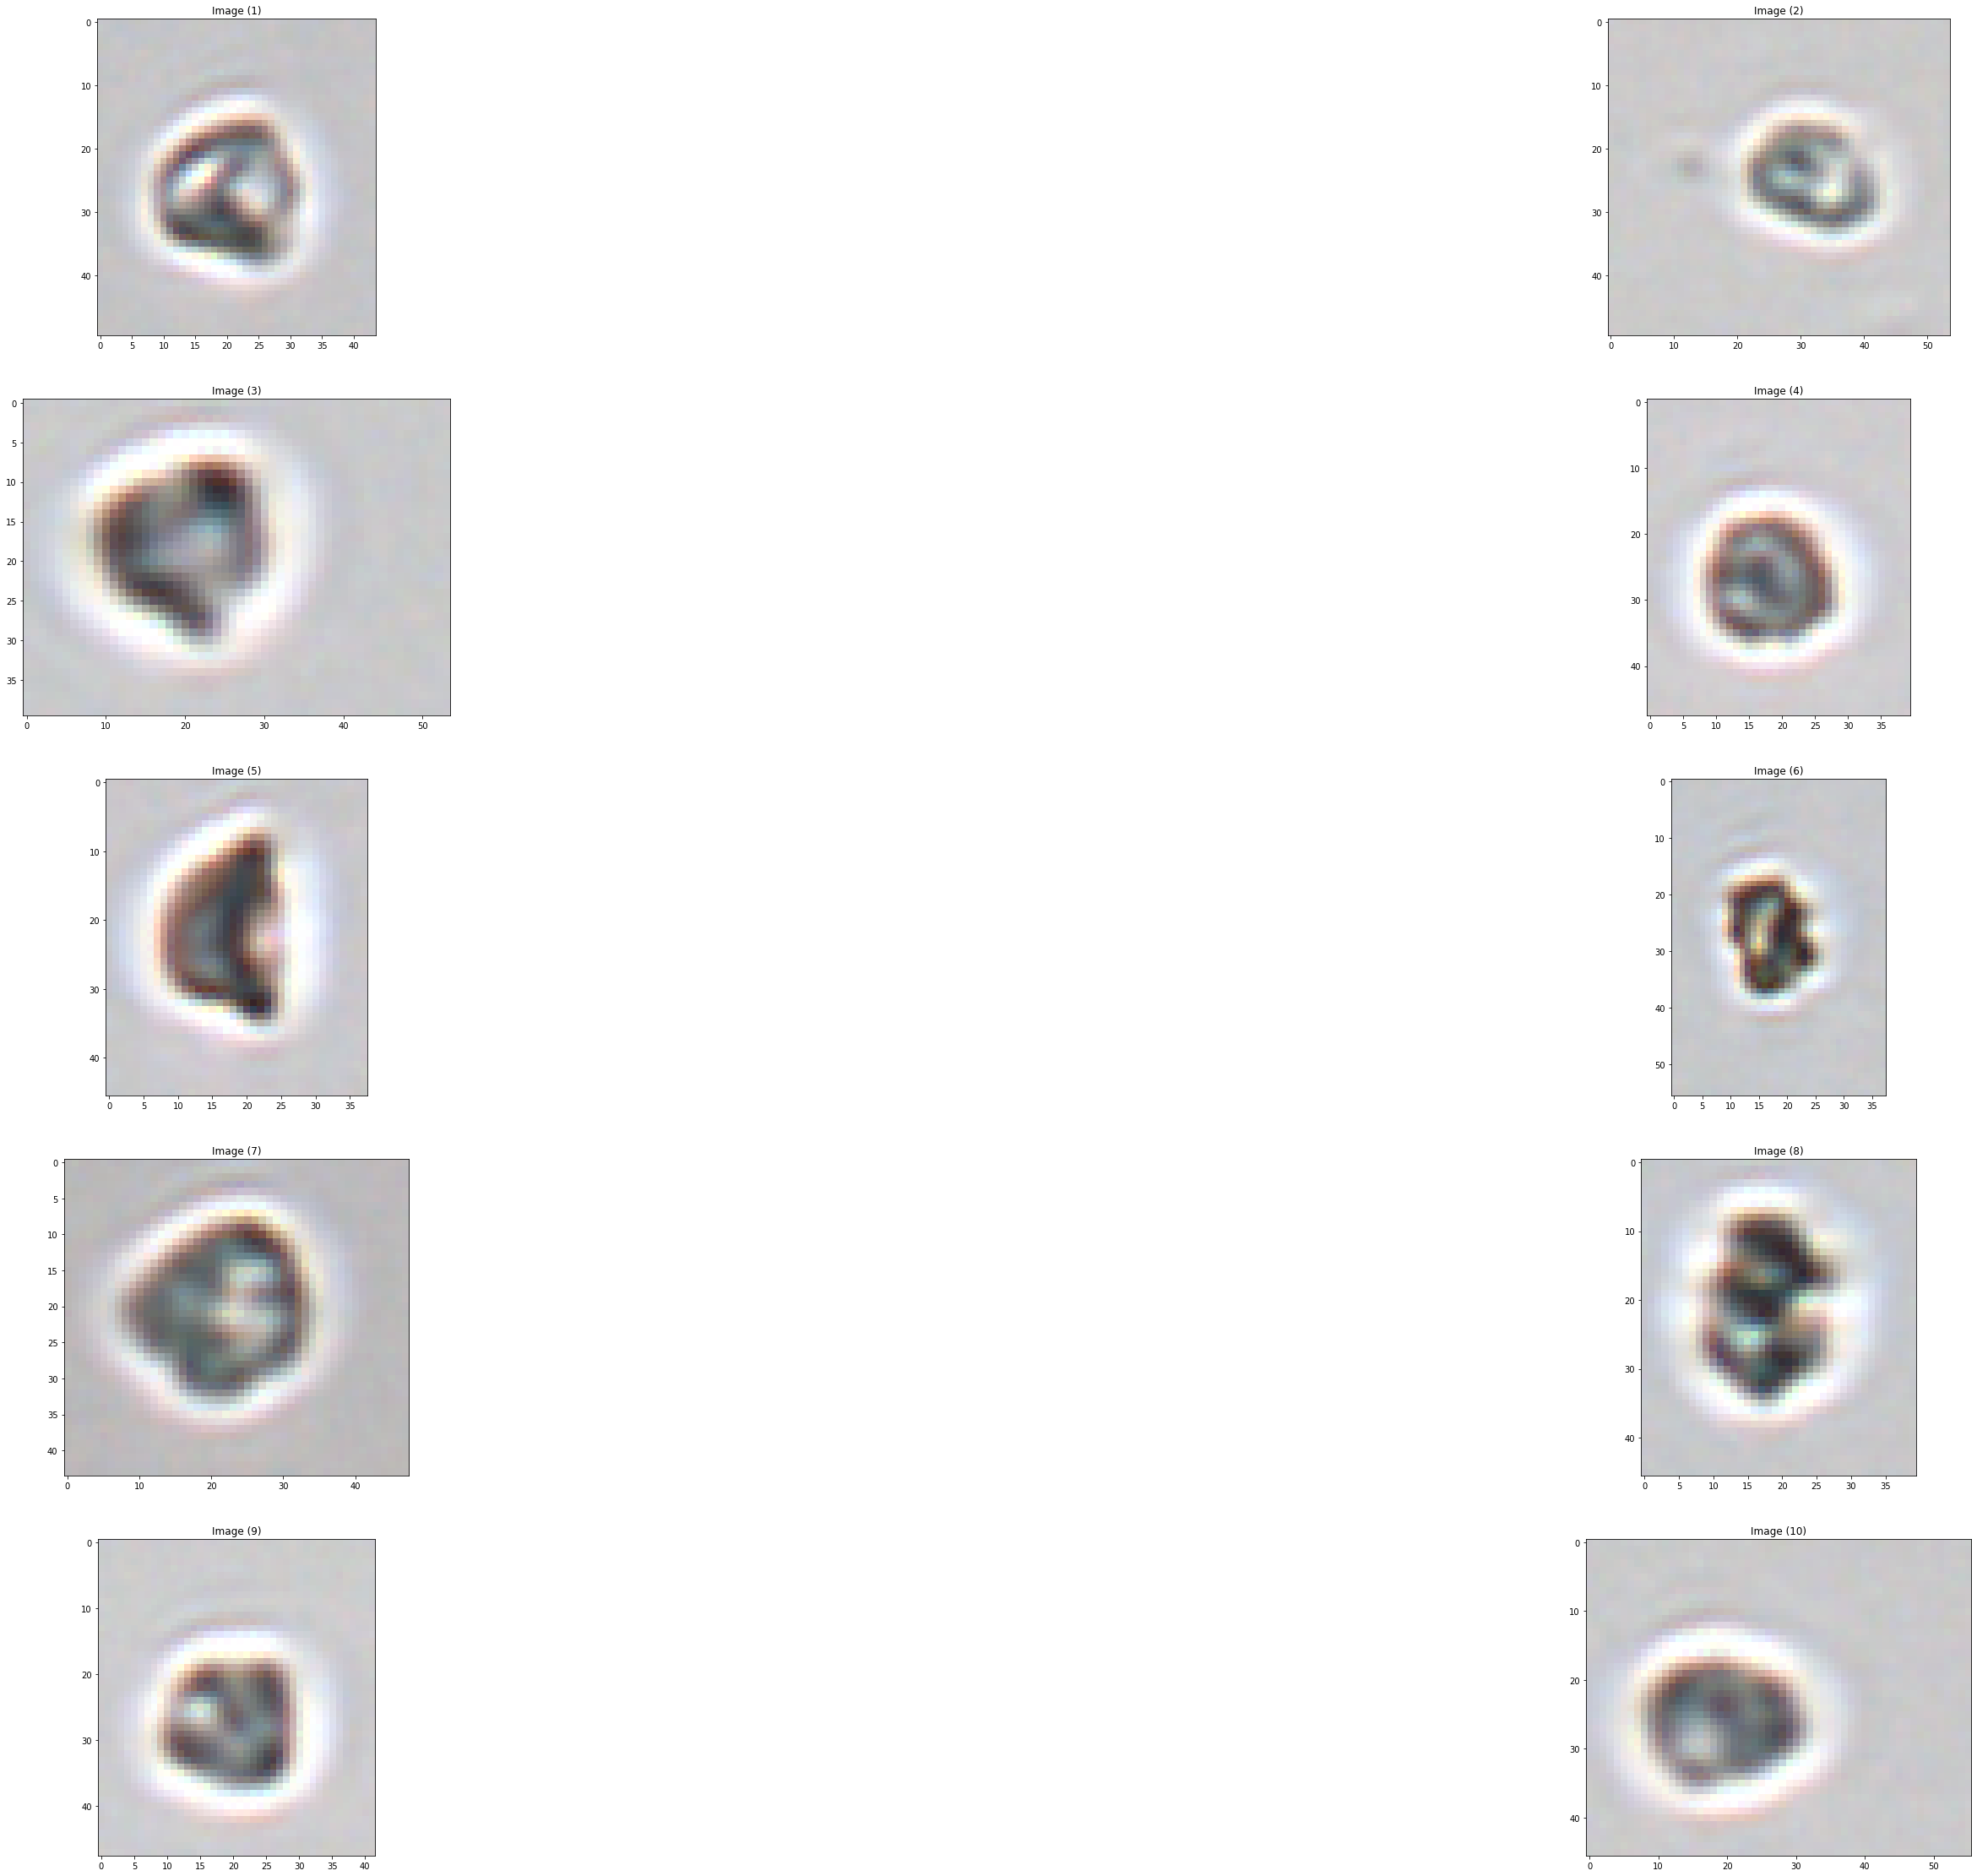

In [23]:
show_images(images[:10])

In [10]:

import shutil, os
output_dir = f'../../data_imgs/pretextselfsupervisedv4'
# output_dir = f'../../data_imgs/selfsuperviseddbscanesp0.12'

clusters_to_write = preds

try:
    os.mkdir(output_dir)
except Exception as e:
    print(e)
    shutil.rmtree(output_dir)
    os.mkdir(output_dir)
    
for cluster in list(set([cluster for cluster, _ in clusters_to_write])):
#     print(class_)
    os.mkdir(os.path.join(output_dir, str(cluster)))
    
for cluster, fp in clusters_to_write:
    cluster_dir = os.path.join(output_dir, str(cluster))
    filename = os.path.basename(fp)
    dest_fp = os.path.join(cluster_dir, f'{filename}')
    shutil.copy(fp, dest_fp)
    

In [11]:
!7z a {os.path.abspath(os.path.dirname(output_dir))}/{os.path.basename(output_dir)}.7z {output_dir} 


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,40 CPUs Intel(R) Xeon(R) CPU E5-2698 v4 @ 2.20GHz (406F1),ASM,AES-NI)

Scanning the drive:
  0M Scan  ../../data_imgs                          101 folders, 4356 files, 92334163 bytes (89 MiB)

Creating archive: /home/devi_prasad/UrineSedimentation/data_imgs/pretextselfsupervisedv4.7z

Items to compress: 4457

      0% 1839 + pretextselfsupervisedv4/45/20190516123725_1_0001_BACT_00198_0.bm                                                                              0% 4356 + pretextselfsupervisedv4/99/20191107202601_5_0105_00364976_0.pn                                                                            2% 4356 + pretextselfsupervisedv4/99/20191107202601_5_0105_00364976_0.pn                                                                            4% 4356 + pretextselfsupervisedv4/99/20191107202601_5_0105_00364976_0.pn                            